# **PROJECT IDS 575: HEALTHCARE FRAUD DETECTION ANALYSIS**

**IMPORTING LIBRARIES TO BE USED IN THE PROJECT**


In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
from scipy import stats

**LINKING THE COLAB TO GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/Shareddrives/IDS575
!ls

/content/drive/Shareddrives/IDS575
AgeVsClaimAmtReimbursed.png
articles.test
articles.train
PotentialFraudDistributionImbalance.png
PotentialFraudDistributionInMergedData.png
RacewiseBeneficiaryDistribution.png
Test-1542969243754.csv
Test_Beneficiarydata-1542969243754.csv
Test_Inpatientdata-1542969243754.csv
Test_Outpatientdata-1542969243754.csv
TopAttendingphysiciansinvlovedinHealthcareFraud.png
TopDiagnosisInnvlovedinHealthcareFraud.png
Train-1542865627584.csv
Train_Beneficiarydata-1542865627584.csv
Train_Inpatientdata-1542865627584.csv
Train_Outpatientdata-1542865627584.csv
WeightAndHeight.csv
words.map.gdoc
words.map.txt


# **DATA EXPLORATION ANALYSIS**

**LOADING DATASETS**

In [ ]:
# Load train dataset

Train=pd.read_csv("Train-1542865627584.csv")
Train_Beneficiarydata=pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv("Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv("Train_Outpatientdata-1542865627584.csv")

# Load Test Dataset

Test=pd.read_csv("Test-1542969243754.csv")
Test_Beneficiarydata=pd.read_csv("Test_Beneficiarydata-1542969243754.csv")
Test_Inpatientdata=pd.read_csv("Test_Inpatientdata-1542969243754.csv")
Test_Outpatientdata=pd.read_csv("Test_Outpatientdata-1542969243754.csv")


In [ ]:
# Checking Shape of datasets

print('Shape of Train data:',Train.shape)
print('Shape of Train_Beneficiarydata data:',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data:',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data:',Train_Outpatientdata.shape)

print('Shape of Test data:',Test.shape)
print('Shape of Test_Beneficiarydata data:',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data:',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data:',Test_Outpatientdata.shape)

Shape of Train data: (5410, 2)
Shape of Train_Beneficiarydata data: (138556, 25)
Shape of Train_Inpatientdata data: (40474, 30)
Shape of Train_Outpatientdata data: (517737, 27)
Shape of Test data: (1353, 1)
Shape of Test_Beneficiarydata data: (63968, 25)
Shape of Test_Inpatientdata data: (9551, 30)
Shape of Test_Outpatientdata data: (125841, 27)


**DATA EXPLORATION**

In [ ]:
## Lets check whether  providers details are unique or not in train data
print(Train.Provider.value_counts(sort=True,ascending=False).head(2))  # number of unique providers in train data.Check for duplicates

print('\n Total missing values in Train :',Train.isna().sum().sum())

print('\n Total missing values in Train :',Test.isna().sum().sum())


PRV51001    1
PRV55516    1
Name: Provider, dtype: int64

 Total missing values in Train : 0

 Total missing values in Train : 0


In [ ]:
#Checking missing values in each column in beneficiary data :

Train_Beneficiarydata.isna().sum()
Test_Beneficiarydata.isna().sum()

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

In [ ]:
# Lets check data types of each column in beneficiary data

Train_Beneficiarydata.dtypes
Test_Beneficiarydata.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [ ]:
# Replacing 2 with 0 for chronic conditions ,that means chronic condition No = 0 and yes = 1

Train_Beneficiarydata = Train_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Train_Beneficiarydata = Train_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)
Train_Beneficiarydata.head(1)
Test_Beneficiarydata.head(1)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70


In [ ]:
Train_Beneficiarydata.head(1)
Test_Beneficiarydata.head(1)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70


In [ ]:
## Lets Create Age column to the dataset

Train_Beneficiarydata['DOB'] = pd.to_datetime(Train_Beneficiarydata['DOB'] , format = '%Y-%m-%d')
Train_Beneficiarydata['DOD'] = pd.to_datetime(Train_Beneficiarydata['DOD'],format = '%Y-%m-%d',errors='ignore')
Train_Beneficiarydata['Age'] = round(((Train_Beneficiarydata['DOD'] - Train_Beneficiarydata['DOB']).dt.days)/365)


Test_Beneficiarydata['DOB'] = pd.to_datetime(Test_Beneficiarydata['DOB'] , format = '%Y-%m-%d')
Test_Beneficiarydata['DOD'] = pd.to_datetime(Test_Beneficiarydata['DOD'],format = '%Y-%m-%d',errors='ignore')
Test_Beneficiarydata['Age'] = round(((Test_Beneficiarydata['DOD'] - Test_Beneficiarydata['DOB']).dt.days)/365)

In [ ]:
## As we see that last DOD value is 2009-12-01 ,which means Beneficiary Details data is of year 2009.
## so we will calculate age of other benficiaries for year 2009.

Train_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Train_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)


Test_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Test_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)

In [ ]:
Train_Beneficiarydata.head(2)
Test_Beneficiarydata.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,67.0
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,1,0,1,1,0,0,0,1490,160,69.0


In [ ]:
# Creating a new variable 'Dead' with flag 1 means Dead and 0 means not Dead

Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.isna(),'Dead']=0
Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.notna(),'Dead']=1
Train_Beneficiarydata.loc[:,'Dead'].head(7)


Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.isna(),'Dead']=0
Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.notna(),'Dead']=1
Test_Beneficiarydata.loc[:,'Dead'].head(3)

0    0.0
1    1.0
2    0.0
Name: Dead, dtype: float64

In [ ]:
# Check missing values in each column in inpatient data
Train_Inpatientdata.isna().sum()

Test_Inpatientdata.isna().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

In [ ]:
## As patient can be admitted for only for 1 day,we will add 1 to the difference of Discharge Date and Admission Date

Train_Inpatientdata['AdmissionDt'] = pd.to_datetime(Train_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatientdata['DischargeDt'] = pd.to_datetime(Train_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Train_Inpatientdata['AdmitForDays'] = ((Train_Inpatientdata['DischargeDt'] - Train_Inpatientdata['AdmissionDt']).dt.days)+1


Test_Inpatientdata['AdmissionDt'] = pd.to_datetime(Test_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Test_Inpatientdata['DischargeDt'] = pd.to_datetime(Test_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Test_Inpatientdata['AdmitForDays'] = ((Test_Inpatientdata['DischargeDt'] - Test_Inpatientdata['AdmissionDt']).dt.days)+1

In [ ]:
## Lets check Min and Max values of AdmitforDays column in Train and Test.

print('Min AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.max())
Train_Inpatientdata.AdmitForDays.isnull().sum()   #Check Null values.

print('Min AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.max())
Test_Inpatientdata.AdmitForDays.isnull().sum()   #Check Null values.

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36
Min AdmitForDays Test:-  1
Max AdmitForDays Test:-  36


0

In [ ]:
 #checking null values for outpatient
Train_Outpatientdata.isna().sum()
Test_Outpatientdata.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1        125807
ClmProcedureCode_2        125832
ClmProcedureCode_3        125839
ClmProcedureCode_4        125841
ClmProcedureCode_5        125841
ClmProcedureCode_6        125841
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

In [ ]:
## Lets Check Shape of datasets after adding new variables

print('Shape of Train data :',Train.shape)
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape)

print('Shape of Test data :',Test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 27)
Shape of Train_Inpatientdata data : (40474, 31)
Shape of Train_Outpatientdata data : (517737, 27)
Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 27)
Shape of Test_Inpatientdata data : (9551, 31)
Shape of Test_Outpatientdata data : (125841, 27)


In [ ]:
Key_Column_To_Merge_Outpatient=Train_Outpatientdata.columns
print(Key_Column_To_Merge_Outpatient)

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')


In [ ]:
# Lets make union of Inpatienta and outpatient data .
# We will use all keys in outpatient data as we want to make union and dont want duplicate columns from both tables.

Train_Allpatientdata=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')


Test_Allpatientdata=pd.merge(Test_Outpatientdata,Test_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

print('Train_Allpatientdata',Train_Allpatientdata.shape)
print('Test_Allpatientdata',Test_Allpatientdata.shape)

Train_Allpatientdata (558211, 31)
Test_Allpatientdata (135392, 31)


In [ ]:
Train_Allpatientdata.head(4)
Test_Allpatientdata.head(4)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,0.0,5939,NaT,NaT,NaN,NaN


In [ ]:
## Lets merge All patient data with beneficiary details data based on 'BeneID' as joining key for inner join
Train_AllPatientDetailsdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

Test_AllPatientDetailsdata=pd.merge(Test_Allpatientdata,Test_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

In [ ]:
## Lets Print shape of data
print('Shape of All Patient Details Train : ',Train_AllPatientDetailsdata.shape)
Train_AllPatientDetailsdata.head()

print('Shape of All Patient Details Test : ',Test_AllPatientDetailsdata.shape)
Test_AllPatientDetailsdata.head(2)

Shape of All Patient Details Train :  (558211, 57)
Shape of All Patient Details Test :  (135392, 57)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Dead
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,1,0,1,1,36000,3204,60,70,67.0,0.0
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,1,0,1,1,36000,3204,60,70,67.0,0.0


In [ ]:
# Lets merge patient data with fradulent providers details data with "Provider" as joining key for inner join

Train_ProviderWithPatientDetailsdata=pd.merge(Train,Train_AllPatientDetailsdata,on='Provider')

Test_ProviderWithPatientDetailsdata=pd.merge(Test,Test_AllPatientDetailsdata,on='Provider')
## Lets Print the shape of dataset
print("Shape of Train Provider with Patient Details data :-",Train_ProviderWithPatientDetailsdata.shape)
Train_ProviderWithPatientDetailsdata.head()

print("Shape of Test Provider with Patient Details data :-",Test_ProviderWithPatientDetailsdata.shape)
Test_ProviderWithPatientDetailsdata.head(2)

Shape of Train Provider with Patient Details data :- (558211, 58)
Shape of Test Provider with Patient Details data :- (135392, 57)


,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Dead
0,PRV51002,BENE13342,CLM129901,2009-01-10,2009-01-10,100,PHY418314,PHY418314,PHY413853,514,...,0,0,0,0,0,0,1310,590,75.0,0.0
1,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40,PHY399539,PHY421140,NaN,7840,...,1,0,0,0,22000,3204,1020,910,89.0,0.0


In [ ]:
# checking percentage of missing values in entire datasets

Train_ProviderWithPatientDetailsdata.isnull().sum()*100/len(Train_ProviderWithPatientDetailsdata)
print('Percent missing values in Test Provider with patient details data :\n')
Test_ProviderWithPatientDetailsdata.isnull().sum()*100/len(Test_ProviderWithPatientDetailsdata)

Percent missing values in Test Provider with patient details data :



Provider                             0.000000
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                  90.603581
ClmDiagnosisCode_9                  92.705625
ClmDiagnosisCode_10                 99.150615
ClmProcedureCode_1                  95.962095
ClmProcedureCode_2                  99.067153
ClmProcedureCode_3                

In [ ]:
# Checking dtypes of both the datasets
Train_ProviderWithPatientDetailsdata.dtypes
Test_ProviderWithPatientDetailsdata.dtypes

Provider                                   object
BeneID                                     object
ClaimID                                    object
ClaimStartDt                               object
ClaimEndDt                                 object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object
ClmDiagnosisCode_7                         object
ClmDiagnosisCode_8                         object
ClmDiagnosisCode_9                         object
ClmDiagnosisCode_10                        object
ClmProcedureCode_1                        float64


# **EXPLORATORY DATA ANALYSIS**

Percent Distribution of Potential Fraud class:- 
 No     61.878931
Yes    38.121069
Name: PotentialFraud, dtype: float64


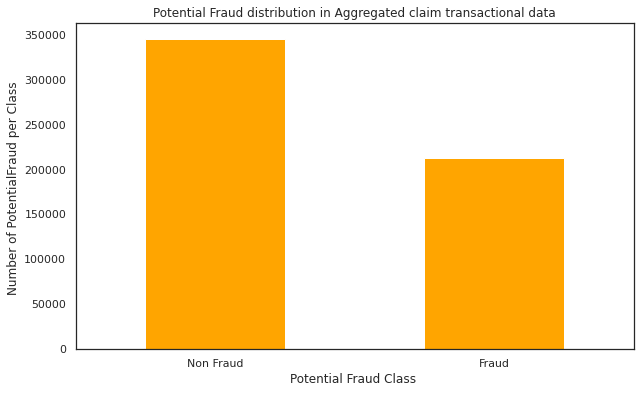

In [ ]:
#Plotting the frequencies of fraud and non-fraud Merged transactions in the data

sns.set_style('white',rc={'figure.figsize':(12,8)})
count_classes = pd.value_counts(Train_ProviderWithPatientDetailsdata['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud class:- \n",count_classes*100/len(Train_ProviderWithPatientDetailsdata))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0,figsize=(10,6), color = "orange")

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution in Aggregated claim transactional data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of PotentialFraud per Class ")

plt.savefig('PotentialFraudDistributionInMergedData')


Percent Distribution of Potential Fraud class:- 
 No     90.64695
Yes     9.35305
Name: PotentialFraud, dtype: float64


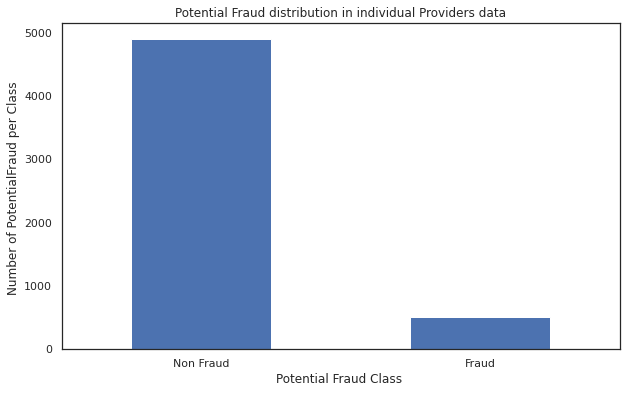

In [ ]:
#PLotting the frequencies of fraud and non-fraud transactions in the train data

count_classes_provider = pd.value_counts(Train['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud class:- \n",count_classes_provider*100/len(Train))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes_provider.plot(kind = 'bar', rot=0,figsize=(10,6))

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution in individual Providers data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of PotentialFraud per Class ")


plt.savefig('PotentialFraudDistributionImbalance')

In [ ]:
#From the above 2 graphs ,we can say that the proportion of fradulent claim transactions are more compared to non fraud providers.So we must get insights from number of claim transactions and amounts involved per - Beneficiary | Beneficiary + Physician |Physician | Diagnosis | Procedure etc...

In [ ]:
print('Providers NonFraud|Fraud Class Percent Distribution in Whole dataset :\n',count_classes/len(Train_ProviderWithPatientDetailsdata)*100)

Providers NonFraud|Fraud Class Percent Distribution in Whole dataset :
 No     61.878931
Yes    38.121069
Name: PotentialFraud, dtype: float64


In [ ]:
print('Providers NonFraud|Fraud Class Percent Distribution :\n',count_classes_provider/len(Train)*100)

Providers NonFraud|Fraud Class Percent Distribution :
 No     90.64695
Yes     9.35305
Name: PotentialFraud, dtype: float64


In [ ]:
#PLotting the frequencies of Statewise beneficiaries
#count_States = pd.value_counts(Train_Beneficiarydata['State'], sort = True)
#print("Percent Distribution of Beneficieries per state:- \n",count_States*100/len(Train_Beneficiarydata))

#Drawing a barplot
#(count_States*100/len(Train_Beneficiarydata)).plot(kind = 'bar', rot=0,figsize=(16,8),fontsize=12,legend=True)

#Giving titles and labels to the plot

#plt.annotate('Maximum Beneficiaries are from this State', xy=(0.01,8), xytext=(8, 6.5),
             #arrowprops=dict(facecolor='black', shrink=0.05))

#plt.yticks(np.arange(0,10,2), ('0 %','2 %', '4 %', '6 %', '8 %', '10%'))
#plt.title("State - wise Beneficiary Distribution",fontsize=18)
#plt.xlabel("State Number",fontsize=15)
#plt.ylabel("Percentage of Beneficiaries "'%',fontsize=15)
#plt.show()

#plt.savefig('StateWiseBeneficiaryDistribution')

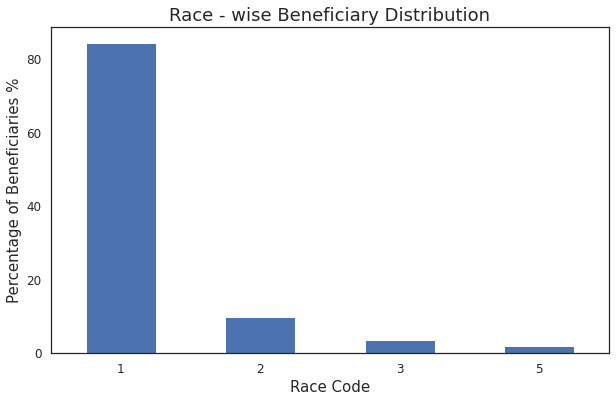

<Figure size 864x576 with 0 Axes>

In [ ]:
#PLotting the frequencies of race-wise beneficiaries
count_Race = pd.value_counts(Train_Beneficiarydata['Race'], sort = True)

#Drawing a barplot
(count_Race*100/len(Train_Beneficiarydata)).plot(kind = 'bar', rot=0,figsize=(10,6),fontsize=12)

#Giving titles and labels to the plot
plt.yticks(np.arange(0,100,20))#, ('0 %','20 %', '40 %', '60 %', '80 %', '100%'))
plt.title("Race - wise Beneficiary Distribution",fontsize=18)
plt.xlabel("Race Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries "'%',fontsize=15)

plt.show()

plt.savefig('RacewiseBeneficiaryDistribution')

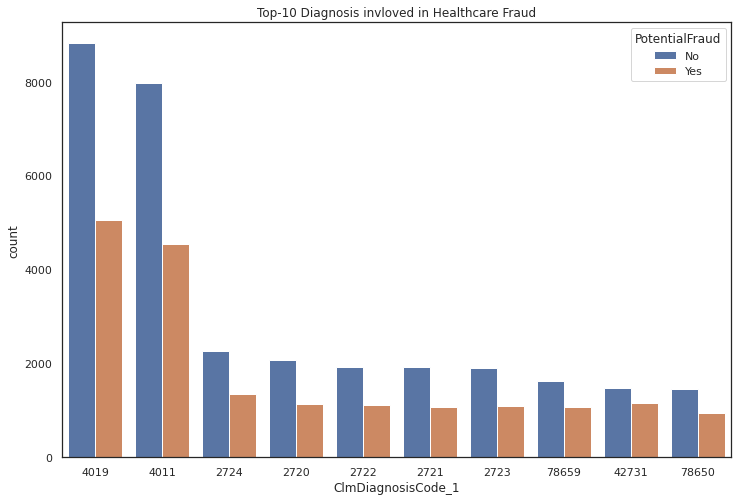

<Figure size 864x576 with 0 Axes>

In [ ]:
## lets plot Top-10 Claim Diagnosis  invloved in Healthcare Fraud

sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.countplot(x='ClmDiagnosisCode_1',hue='PotentialFraud',data=Train_ProviderWithPatientDetailsdata
              ,order=Train_ProviderWithPatientDetailsdata.ClmDiagnosisCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Diagnosis invloved in Healthcare Fraud')
plt.show()

plt.savefig('TopDiagnosisInnvlovedinHealthcareFraud')


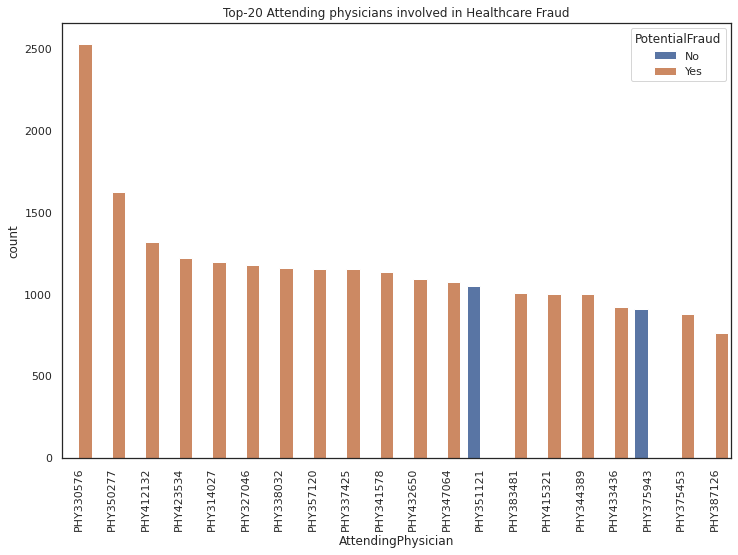

<Figure size 864x576 with 0 Axes>

In [ ]:
### lets plot Top-20 Attending Physicians invloved in Healthcare Fraud

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax= sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=Train_ProviderWithPatientDetailsdata
              ,order=Train_ProviderWithPatientDetailsdata.AttendingPhysician.value_counts().iloc[:20].index)


plt.title('Top-20 Attending physicians involved in Healthcare Fraud')
plt.xticks(rotation=90)
plt.show()

plt.savefig('TopAttendingphysiciansinvlovedinHealthcareFraud')

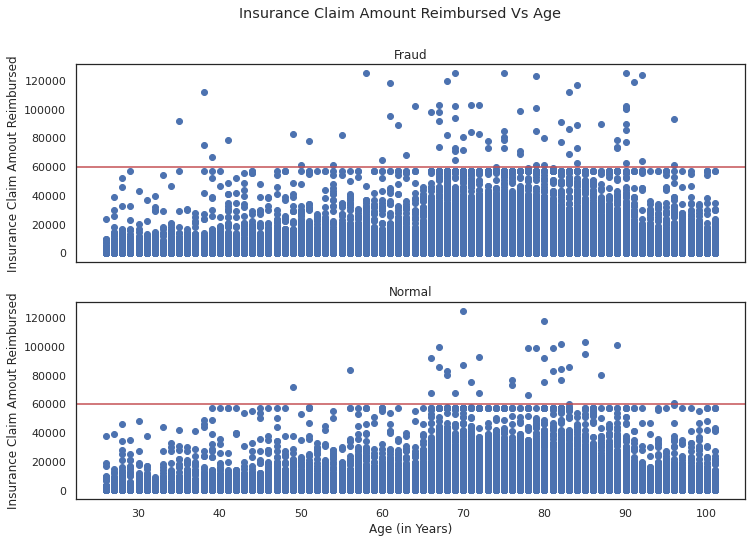

In [ ]:
## Let's See Insurance Claim Amount Reimbursed Vs Age
sns.set(rc={'figure.figsize':(12,8)},style='white')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Insurance Claim Amount Reimbursed Vs Age')

ax1.scatter(Train_ProviderWithPatientDetailsdata[Train_ProviderWithPatientDetailsdata.PotentialFraud=='Yes'].Age,
            Train_ProviderWithPatientDetailsdata[Train_ProviderWithPatientDetailsdata.PotentialFraud=='Yes'].InscClaimAmtReimbursed)
ax1.set_title('Fraud')
ax1.axhline(y=60000,c='r')
ax1.set_ylabel('Insurance Claim Amout Reimbursed')

ax2.scatter(Train_ProviderWithPatientDetailsdata[Train_ProviderWithPatientDetailsdata.PotentialFraud=='No'].Age,
            Train_ProviderWithPatientDetailsdata[Train_ProviderWithPatientDetailsdata.PotentialFraud=='No'].InscClaimAmtReimbursed)
ax2.set_title('Normal')
ax2.axhline(y=60000,c='r')
ax2.set_xlabel('Age (in Years)')
ax2.set_ylabel('Insurance Claim Amout Reimbursed')

plt.show()
f.savefig('AgeVsClaimAmtReimbursed')

#From the above graph,we see that occurance of fraud cases is more frequent in lower age groups(30-70 years) compared to higher age groups(70+ years).Age is one of the important feature for differentiating between fraud abd non fraud behaviour.

In [ ]:
# Lets check the last record of Test_ProviderWithPatientDetailsdata

Test_ProviderWithPatientDetailsdata.iloc[[135391]]

,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Dead
135391,PRV57750,BENE150236,CLM675578,2009-11-10,2009-11-10,200,PHY323525,PHY323525,PHY323525,4788,...,1,0,0,0,0,0,290,1120,67.0,0.0


In [ ]:
# Lets check the last record of Train_ProviderWithPatientDetailsdata

Train_ProviderWithPatientDetailsdata.iloc[[558210]]

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Dead
558210,PRV57763,No,BENE158531,CLM701529,2009-11-26,2009-11-26,40,PHY321072,NaN,PHY321072,...,1,0,0,0,0,0,3700,240,58.0,0.0


# **CREATING NEW FEATURES THROUGH FEATURE ENGINEERING**

In [ ]:
Train_ProviderWithPatientDetailsdata["PerProviderAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_Age"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['Age'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_NoOfMonths_PartACov"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_NoOfMonths_PartBCov"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerProviderAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_Age"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['Age'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_NoOfMonths_PartACov"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_NoOfMonths_PartBCov"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['AdmitForDays'].transform('mean')
#lets check shape

print('Train',Train_ProviderWithPatientDetailsdata.shape)
Train_ProviderWithPatientDetailsdata.iloc[:,-10:].head(2)

print("Test ",Test_ProviderWithPatientDetailsdata.shape)
Test_ProviderWithPatientDetailsdata.iloc[:,-10:].head(4)

#Average features grouped by BeneID

## Grouping based on BeneID explains amounts involved per beneficiary.Reason to derive this feature is that one beneficiary
## can go to multiple providers and can be involved in fraud cases
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['AdmitForDays'].transform('mean')

### Average features grouped by OtherPhysician.

Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['AdmitForDays'].transform('mean')

Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOtherPhysicianAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('OtherPhysician')['AdmitForDays'].transform('mean')

##Average features grouped by OperatingPhysician

Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['AdmitForDays'].transform('mean')

Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['AdmitForDays'].transform('mean')

### Average features grouped by AttendingPhysician

Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['AdmitForDays'].transform('mean')

###  Average features grouped by DiagnosisGroupCode

Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['AdmitForDays'].transform('mean')

Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerDiagnosisGroupCodeAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('DiagnosisGroupCode')['AdmitForDays'].transform('mean')

### Average features grouped by ClmAdmitDiagnosisCode

Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['AdmitForDays'].transform('mean')

Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['AdmitForDays'].transform('mean')

### Average features grouped by ClmProcedureCode_1

Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['AdmitForDays'].transform('mean')

Train (558211, 68)
Test  (135392, 67)


In [ ]:
### Average features grouped by ClmProcedureCode_2

Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_2Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_2')['AdmitForDays'].transform('mean')

###  Average features grouped by ClmProcedureCode_3

Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_3Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_3')['AdmitForDays'].transform('mean')

### Average features grouped by ClmDiagnosisCode_1

Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['AdmitForDays'].transform('mean')

###  Average features grouped by ClmDiagnosisCode_2

Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['AdmitForDays'].transform('mean')

###  Average features grouped by ClmDiagnosisCode_3

Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['AdmitForDays'].transform('mean')

###  Average features grouped by ClmDiagnosisCode_4

Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['AdmitForDays'].transform('mean')

### Average Feature based on grouping based on combinations of different variables

Train_ProviderWithPatientDetailsdata["ClmCount_Provider"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_AttendingPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_OtherPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_OperatingPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmAdmitDiagnosisCode"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_2"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_3"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_4"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_5"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_2"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_3"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_4"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_5"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_6"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_7"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_8"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_9"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_DiagnosisGroupCode"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_OtherPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_OperatingPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')


Test_ProviderWithPatientDetailsdata["ClmCount_Provider"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_AttendingPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_OtherPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_OperatingPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmAdmitDiagnosisCode"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_2"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_3"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_4"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_5"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_2"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_3"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_4"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_5"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_6"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_7"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_8"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_9"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_DiagnosisGroupCode"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_OtherPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_OperatingPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')

<ipython-input-171-1c704d587895>:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
<ipython-input-171-1c704d587895>:101: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnu

In [ ]:
# Checking the shape after creating new features.

print('Train_ProviderWithPatientDetailsdata shape-',Train_ProviderWithPatientDetailsdata.shape)
print('Test_ProviderWithPatientDetailsdata shape-',Test_ProviderWithPatientDetailsdata.shape)

Train_ProviderWithPatientDetailsdata shape- (558211, 188)
Test_ProviderWithPatientDetailsdata shape- (135392, 187)


In [ ]:
# Checking unique values of ICD Diagnosis Codes

diagnosiscode_2chars=Train_ProviderWithPatientDetailsdata['ClmDiagnosisCode_1'].astype(str).str[0:2]
diagnosiscode_2chars.unique()

array(['59', '78', 'V4', '29', '03', '51', 'na', '71', 'V1', '27', '42',
       'V7', '24', '41', '56', '79', '04', '35', '85', 'V5', '72', '44',
       '45', '18', '60', '50', '57', '40', '16', '25', '68', '15', '82',
       '28', '61', '47', '99', '20', '70', '33', '31', '49', '88', '48',
       '53', '43', '91', '55', '00', '58', '73', '46', '19', '17', 'V0',
       '34', 'V6', '62', 'V8', '11', '36', '83', 'E8', '02', '32', '52',
       '38', '23', '84', '37', 'V2', '87', '30', '90', '21', '12', '92',
       '39', '63', '69', '64', '81', '89', '95', '80', '22', '07', '06',
       '93', '94', '54', '26', '05', '13', '74', '14', '98', '08', '97',
       '75', '66', 'E9', '09', '96', '10', '77', '86', '65', '67', '01',
       '76'], dtype=object)

In [ ]:
##### Lets impute numeric columns with 0

cols1 = Train_ProviderWithPatientDetailsdata.select_dtypes([np.number]).columns
cols2 = Train_ProviderWithPatientDetailsdata.select_dtypes(exclude = [np.number]).columns

Train_ProviderWithPatientDetailsdata[cols1] = Train_ProviderWithPatientDetailsdata[cols1].fillna(value=0)
Test_ProviderWithPatientDetailsdata[cols1]=Test_ProviderWithPatientDetailsdata[cols1].fillna(value=0)
print('Test_ProviderWithPatientDetailsdata shape:',Test_ProviderWithPatientDetailsdata.shape)

Test_ProviderWithPatientDetailsdata shape: (135392, 187)


In [ ]:
# Lets remove unnecessary columns ,as we grouped based on these columns and derived maximum infromation from them.

cols=Train_ProviderWithPatientDetailsdata.columns
cols[:58]

remove_these_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'ClmAdmitDiagnosisCode', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD',
        'State', 'County']

Train_category_removed=Train_ProviderWithPatientDetailsdata.drop(axis=1,columns=remove_these_columns)
Test_category_removed=Test_ProviderWithPatientDetailsdata.drop(axis=1,columns=remove_these_columns)

In [ ]:
## Lets Check shape and missing values

print('Train Shape :',Train_category_removed.shape)
print('Test Shape : ',Test_category_removed.shape)
print("Train Missing Values",Train_category_removed.isnull().sum().sum())
print("Test Missing Values",Test_category_removed.isnull().sum().sum())

Train Shape : (558211, 157)
Test Shape :  (135392, 156)
Train Missing Values 0
Test Missing Values 0


In [ ]:
## Lets Convert types of gender and race to categorical.

Train_category_removed.Gender=Train_category_removed.Gender.astype('category')
Test_category_removed.Gender=Test_category_removed.Gender.astype('category')

Train_category_removed.Race=Train_category_removed.Race.astype('category')
Test_category_removed.Race=Test_category_removed.Race.astype('category')

In [ ]:
# Lets create dummies for categorrical columns.

Train_category_removed=pd.get_dummies(Train_category_removed,columns=['Gender','Race'],drop_first=True)
Test_category_removed=pd.get_dummies(Test_category_removed,columns=['Gender','Race'],drop_first=True)


In [ ]:
Train_category_removed.head().T
Test_category_removed.iloc[135391:135393]


,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
135391,PRV57750,200,0.0,0.0,0,12,12,0,1,0,...,0.0,1.0,1.0,0.0,1.0,0.0,1,0,1,0


In [ ]:
Train_category_removed.PotentialFraud.replace(['Yes','No'],['1','0'],inplace=True)
Train_category_removed.head()
Train_category_removed.PotentialFraud=Train_category_removed.PotentialFraud.astype('int64')
Train_category_removed.PotentialFraud.dtypes
Train_category_removed.PotentialFraud.min()            #Converting Target values to 1 - YES and 0 - NO

0

In [ ]:
Train_category_removed.PotentialFraud.max()


1

In [ ]:
print('Test Shape before removing',Test_category_removed.shape)


Test Shape before removing (135392, 158)


In [ ]:
Test_category_removed=Test_category_removed.iloc[:135392]   ##Remove train data from appended test data
Test_category_removed.tail()   # Checking last 5 records.

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
135387,PRV57750,1300,0.0,0.0,0,12,12,0,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0,0
135388,PRV57750,10,0.0,0.0,0,12,12,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0,0
135389,PRV57750,200,0.0,0.0,0,12,12,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,1,0,0
135390,PRV57750,2300,0.0,0.0,0,12,12,1,0,1,...,0.0,1.0,1.0,0.0,1.0,0.0,1,0,0,0
135391,PRV57750,200,0.0,0.0,0,12,12,0,1,0,...,0.0,1.0,1.0,0.0,1.0,0.0,1,0,1,0


In [ ]:
print('Test Shape before removing',Test_category_removed.shape)

Test Shape before removing (135392, 158)


**AGGREGATING AT UNIQUE PROVIDER LEVEL FOR MODELLING**

In [ ]:
### Lets aggregate claims data to unique providers.

Train_category_removed_groupedbyProv_PF=Train_category_removed.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
Test_category_removed_groupedbyProv_PF=Test_category_removed.groupby(['Provider'],as_index=False).agg('sum')
print('Providers in Train:' ,Train_category_removed_groupedbyProv_PF.shape)
print('Providers in Test :',Test_category_removed_groupedbyProv_PF.shape)

Providers in Train: (5410, 158)
Providers in Test : (1353, 157)


In [ ]:
Train_category_removed_groupedbyProv_PF.head(3)
Test_category_removed_groupedbyProv_PF.head(3)


,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
0,PRV51002,53790,380.0,0.0,2424,2460,79,108,72,25,...,0.0,202.0,30.0,0.0,204.0,0.0,134.0,30.0,2.0,4.0
1,PRV51006,30720,0.0,0.0,1224,1224,35,69,50,15,...,0.0,99.0,26.0,0.0,99.0,0.0,59.0,26.0,0.0,0.0
2,PRV51009,27230,1238.0,8.0,468,468,8,17,19,1,...,2.0,40.0,24.0,2.0,41.0,2.0,23.0,6.0,0.0,0.0


In [ ]:
print('Train shape:',Train_category_removed_groupedbyProv_PF.shape)

Train shape: (5410, 158)


In [ ]:
Train_category_removed_groupedbyProv_PF.head(3)


,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
0,PRV51001,0,104640,5340.0,30.0,300,300,15,19,17,...,2.0,24.0,5.0,2.0,24.0,2.0,16.0,4.0,0.0,0.0
1,PRV51003,1,605670,66286.0,382.0,1560,1567,56,80,64,...,39.0,132.0,45.0,39.0,132.0,39.0,78.0,24.0,0.0,1.0
2,PRV51004,0,52170,310.0,0.0,1768,1782,64,88,50,...,0.0,143.0,27.0,0.0,143.0,0.0,103.0,24.0,5.0,0.0


In [ ]:
## Lets Seperate out Target and providers from independent variables.Create Target column y.

X=Train_category_removed_groupedbyProv_PF.drop(axis=1,columns=['Provider','PotentialFraud'])
y=Train_category_removed_groupedbyProv_PF['PotentialFraud']


In [ ]:
## Lets apply StandardScaler and transform values to its z form,where 99.7% values range between -3 to 3.
sc=StandardScaler()   # MinMaxScaler
sc.fit(X)
X_std=sc.transform(X)

X_teststd=sc.transform(Test_category_removed_groupedbyProv_PF.iloc[:,1:])   #Apply Standard Scaler to unseen data as well.
print('X Shape:',X_std.shape)

X Shape: (5410, 156)


In [ ]:
## 'stratify=y' will make sure equal distribution of yes:no in both train and validation

X_train,X_val,y_train,y_val = train_test_split(X_std,y,test_size=0.3,random_state=101,stratify=y,shuffle=True)
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)

print('X_val :',X_val.shape)
print('y_val :',y_val.shape)

X_train : (3787, 156)
y_train : (3787,)
X_val : (1623, 156)
y_val : (1623,)


In [ ]:
print('X_teststd',X_teststd.shape)

X_teststd (1353, 156)


# **MODEL BIULDING**

## **Gaussian Navie Bayes Classifier**

In [ ]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
import numpy as np
import seaborn as sns

In [ ]:
def validate_model(clf, x_train, x_test, y_train, y_test):
    # predict the probability of train data
    y_train_pred = pred_prob(clf, x_train)
    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test)
    # calculate tpr, fpr for diffeent thresholds using roc_curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    print("Train AUC = ", train_auc)
    test_auc = auc(test_fpr, test_tpr)
    print("Test AUC = ", test_auc)

    draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)

    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

#     print(len(test_prediction))

    return test_auc, best_t

In [ ]:
def pred_prob(clf, data):
    # predicts the probabability of class label using the model
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc))
    plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc))
    plt.legend()
    plt.xlabel("False Positive Rate(FPR)", size = 14)
    plt.ylabel("True Positive Rate(TPR)", size = 14)
    plt.title("Area Under Curve", size = 16)
    plt.grid(b=True, which='major', color='g', linestyle='-')
    plt.show()

def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
#     print("max(tpr*(1-fpr)) = ", max(tpr*(1-fpr)), "for threshold = ", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
# gaussian navie bayes wihtout prior
from sklearn.naive_bayes import GaussianNB
model_gaussian=GaussianNB()
model_gaussian.fit(X_train,y_train)

clf_model_gaussian=CalibratedClassifierCV(model_gaussian)
clf_model_gaussian.fit(X_train,y_train)


CalibratedClassifierCV(base_estimator=GaussianNB())

Train AUC =  0.7745033662968759
Test AUC =  0.7726394504275647


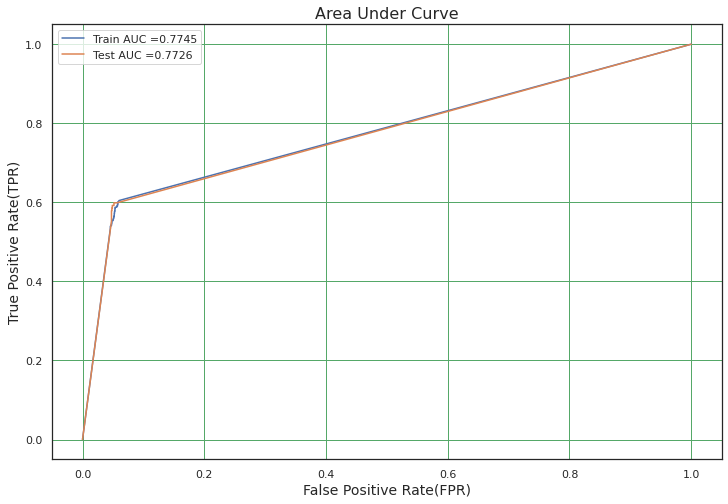

Best Threshold = 0.0469
Model AUC is : 0.7726


In [ ]:
test_auc1, best_t1 = validate_model(clf_model_gaussian, X_train, X_val, y_train, y_val)

print("Best Threshold = {:.4f}".format(best_t1))
print("Model AUC is : {:.4f}".format(test_auc1))

In [ ]:
# gaussian naive bayes with priors[0.5,.0.5]
# for balancing data

from sklearn.naive_bayes import GaussianNB

model_gaussian1=GaussianNB(priors=[0.5,0.5])
model_gaussian1.fit(X_train,y_train)

clf_model_gaussian1=CalibratedClassifierCV(model_gaussian)
clf_model_gaussian1.fit(X_train,y_train)


CalibratedClassifierCV(base_estimator=GaussianNB())

Train AUC =  0.7745033662968759
Test AUC =  0.7726394504275647


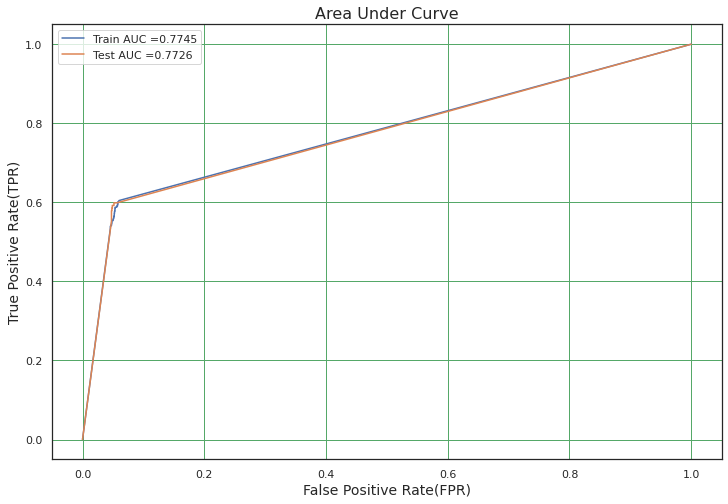

Best Threshold = 0.0469
Model AUC is : 0.7726


In [ ]:
test_auc2, best_t2 = validate_model(clf_model_gaussian1, X_train, X_val, y_train, y_val)

print("Best Threshold = {:.4f}".format(best_t2))
print("Model AUC is : {:.4f}".format(test_auc2))

In [ ]:
nb_train_pred = (clf_model_gaussian1.predict_proba(X_train)[:,1]>0.0469).astype(bool)   # Set threshold to best threshold
nb_val_pred = (clf_model_gaussian1.predict_proba(X_val)[:,1]>0.0469).astype(bool)# Set threshold to best threshold

In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity

from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,roc_curve

cm0 = confusion_matrix(y_train, nb_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, nb_val_pred,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy

accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Test : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_val, nb_val_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, nb_val_pred)
print("AUC         :",AUC)


print("F1-Score Train",f1_score(y_train,nb_train_pred))
print("F1-Score Validation : ",f1_score(y_val, nb_val_pred))

Confusion Matrix Train : 
 [[ 208  146]
 [ 186 3247]]
Confusion Matrix Test: 
 [[  91   61]
 [  78 1393]]
Accuracy Train :  0.9123316609453394
Accuracy Test :  0.9143561306223044
Sensitivity :  0.5986842105263158
Specificity :  0.946974847042828
Kappa Value : 0.5196046907307599
AUC         : 0.7728295287845719
F1-Score Train 0.5561497326203209
F1-Score Validation :  0.5669781931464174


## **Linear Support Vector Classifier**

In [ ]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
import numpy as np
import seaborn as sns

In [ ]:
grid={"C":[0.5, 1.0], "penalty":["l1","l2"]}
svm_clf = svm.LinearSVC()
svm_cv = GridSearchCV(svm_clf, grid, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)
svm_cv.fit(X_train, y_train)

In [ ]:
print("best parameters = ",svm_cv.best_params_)
print("roc_auc_score :",svm_cv.best_score_)

best parameters =  {'C': 0.5, 'penalty': 'l2'}
roc_auc_score : 0.896922435901689


In [ ]:
from sklearn.calibration import CalibratedClassifierCV
linear_svc = LinearSVC(C=1.0, penalty='l2')
clb_clf_svc = CalibratedClassifierCV(linear_svc)
clb_clf_svc.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CalibratedClassifierCV(base_estimator=LinearSVC())

In [ ]:
def validate_model(clf, x_train, x_test, y_train, y_test):
    # predict the probability of train data
    y_train_pred = pred_prob(clf, x_train)
    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test)
    # calculate tpr, fpr for diffeent thresholds using roc_curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    print("Train AUC = ", train_auc)
    test_auc = auc(test_fpr, test_tpr)
    print("Test AUC = ", test_auc)

    draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)

    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

#     print(len(test_prediction))

    return test_auc, best_t

In [ ]:
def pred_prob(clf, data):
    # predicts the probabability of class label using the model
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc))
    plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc))
    plt.legend()
    plt.xlabel("False Positive Rate(FPR)", size = 14)
    plt.ylabel("True Positive Rate(TPR)", size = 14)
    plt.title("Area Under Curve", size = 16)
    plt.grid(b=True, which='major', color='g', linestyle='-')
    plt.show()

def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
#     print("max(tpr*(1-fpr)) = ", max(tpr*(1-fpr)), "for threshold = ", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train AUC =  0.952649673079993
Test AUC =  0.9024115352964328


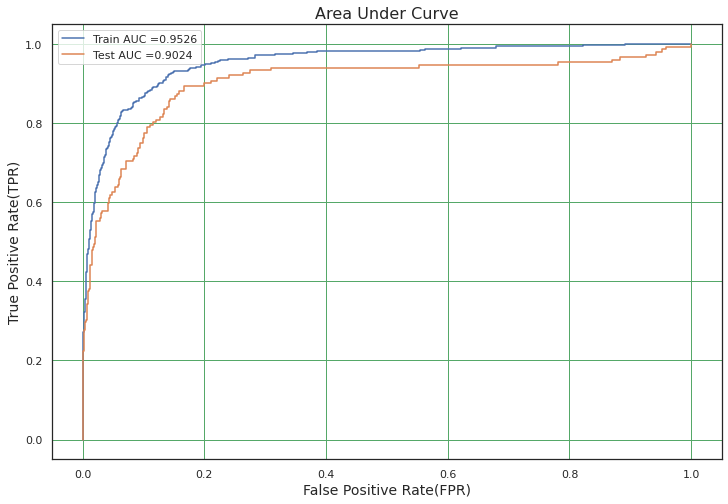

Best Threshold = 0.0628
Model AUC is : 0.9024


In [ ]:
# Validate SVC model
test_auc, best_t = validate_model(clb_clf_svc, X_train, X_val, y_train, y_val)

print("Best Threshold = {:.4f}".format(best_t))
print("Model AUC is : {:.4f}".format(test_auc))

In [ ]:
lsvc_train_pred = (clb_clf_svc.predict_proba(X_train)[:,1]>0.0616).astype(bool)   # Set threshold to best threshold
lsvc_val_pred = (clb_clf_svc.predict_proba(X_val)[:,1]>0.0616).astype(bool)# Set threshold to best threshold

#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,roc_curve

cm0 = confusion_matrix(y_train, lsvc_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, lsvc_val_pred,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Test : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_val, lsvc_val_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, lsvc_val_pred)
print("AUC         :",AUC)


print("F1-Score Train",f1_score(y_train,lsvc_train_pred))
print("F1-Score Validation : ",f1_score(y_val, lsvc_val_pred))


Confusion Matrix Train : 
 [[ 328   26]
 [ 507 2926]]
Confusion Matrix Test: 
 [[ 136   16]
 [ 249 1222]]
Accuracy Train :  0.8592553472405599
Accuracy Test :  0.8367221195317314
Sensitivity :  0.8947368421052632
Specificity :  0.8307273963290279
Kappa Value : 0.42996854916628113
AUC         : 0.8627321192171455
F1-Score Train 0.5517241379310345
F1-Score Validation :  0.5065176908752328


## **Support Vector Classifier**

In [ ]:
param_grid={'C':[0.5, 1.0], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)


In [ ]:
print("best parameters = ",grid.best_params_)

best parameters =  {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
from sklearn.calibration import CalibratedClassifierCV
best_svc = SVC(C=1.0, gamma=0.01, kernel="rbf")
clb_svc = CalibratedClassifierCV(best_svc)
clb_svc.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=SVC(gamma=0.01))

Train AUC =  0.8819171188250957
Test AUC =  0.8074752227271101


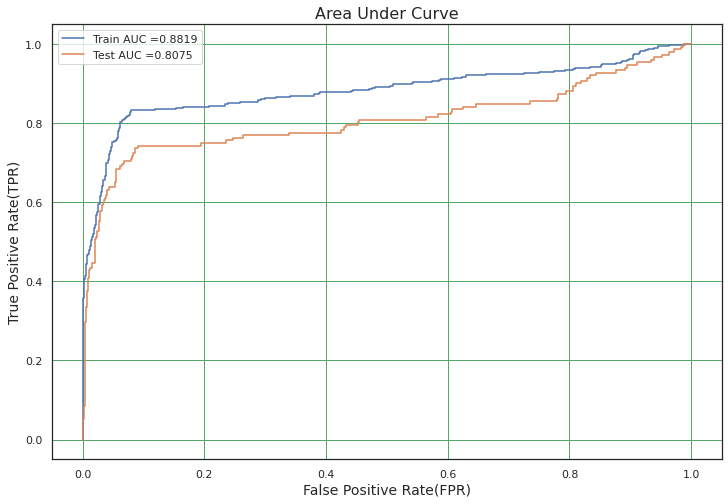

Best Threshold = 0.0532
Model AUC is : 0.8075


In [ ]:
# Validate SVC model
test_auc3, best_t3 = validate_model(clb_svc, X_train, X_val, y_train, y_val)

print("Best Threshold = {:.4f}".format(best_t3))
print("Model AUC is : {:.4f}".format(test_auc3))

In [ ]:
svc_train_pred = (clb_svc.predict_proba(X_train)[:,1]>0.0532).astype(bool)   # Set threshold to best threshold
svc_val_pred = (clb_svc.predict_proba(X_val)[:,1]>0.0532).astype(bool)# Set threshold to best threshold

#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,roc_curve

cm0 = confusion_matrix(y_train, svc_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, svc_val_pred,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Test : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_val, svc_val_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, svc_val_pred)
print("AUC         :",AUC)


print("F1-Score Train",f1_score(y_train,svc_train_pred))
print("F1-Score Validation : ",f1_score(y_val, svc_val_pred))

Confusion Matrix Train : 
 [[ 294   60]
 [ 273 3160]]
Confusion Matrix Test: 
 [[ 113   39]
 [ 140 1331]]
Accuracy Train :  0.9120675996831265
Accuracy Test :  0.8897104128157732
Sensitivity :  0.743421052631579
Specificity :  0.9048266485384092
Kappa Value : 0.49945641218256975
AUC         : 0.8241238505849942
F1-Score Train 0.6384364820846905
F1-Score Validation :  0.5580246913580248


In [ ]:
grid_predictions = grid.predict(X_val)
print(confusion_matrix(y_val,grid_predictions))

[[1455   16]
 [  91   61]]


In [ ]:
print(classification_report(y_val,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1471
           1       0.79      0.40      0.53       152

    accuracy                           0.93      1623
   macro avg       0.87      0.70      0.75      1623
weighted avg       0.93      0.93      0.92      1623



## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

log = LogisticRegressionCV(cv=10,class_weight='balanced',random_state=123)

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
#in the input data as ``n_samples / (n_classes * np.bincount(y))``.

log.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegressionCV(class_weight='balanced', cv=10, random_state=123)

In [ ]:
# predicting probability of 1 and 0 for X_train and X_val

log_train_pred_probability=log.predict_proba(X_train)
log_val_pred_probability=log.predict_proba(X_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


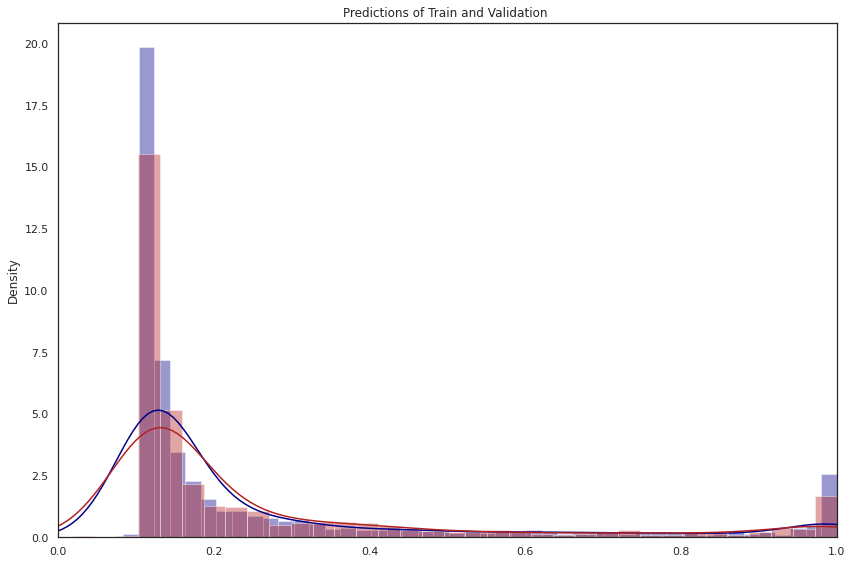

In [ ]:
#Comparing model prediction performance on train and Validation both.

fig = plt.figure(figsize=(12,8))

sns.distplot(log.predict_proba(X_train)[:,1],color='darkblue')
sns.distplot(log.predict_proba(X_val)[:,1],color='firebrick')
plt.title('Predictions of Train and Validation ')
plt.xlim([0, 1])

plt.tight_layout()

plt.show()

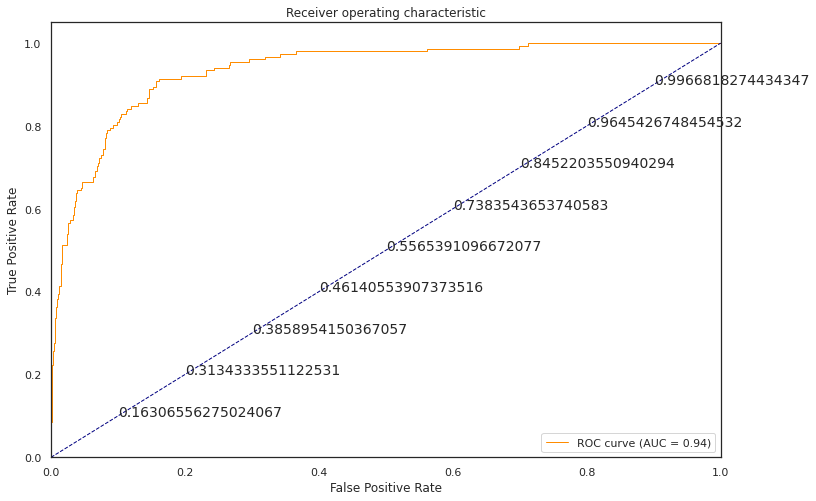

In [ ]:
from sklearn.metrics import roc_curve, auc,precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_val,log.predict_proba(X_val)[:,1])         #log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
fpr, tpr, thresholds =roc_curve(y_val, log.predict_proba(X_val)[:,1],pos_label=1)     #log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.935794


Text(0.5, 1.0, 'Precision Vs Recall')

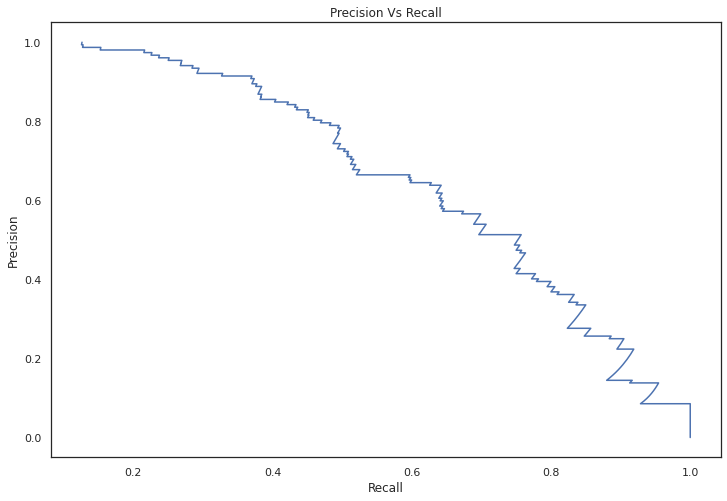

In [ ]:
## Lets Check precision and recall
precision, recall, _ = precision_recall_curve(y_val, log.predict_proba(X_val)[:,1])

plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Vs Recall')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


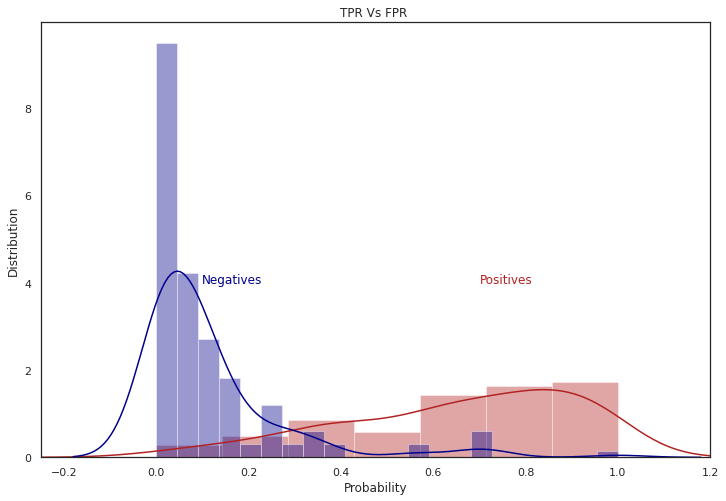

In [ ]:
# Checking Tpr vs fpr distribution.

fig = plt.figure(figsize=(12,8))

sns.distplot(tpr,color='firebrick')

sns.distplot(fpr,color='darkblue')
plt.title('TPR Vs FPR ')
plt.xlim([-.25, 1.2])

plt.text(0.1,4,'Negatives',color='darkblue')
plt.text(0.7,4,'Positives',color='firebrick')
plt.xlabel('Probability')
plt.ylabel('Distribution')
plt.show()

Train AUC =  0.9473142859023667
Test AUC =  0.9357937672188629


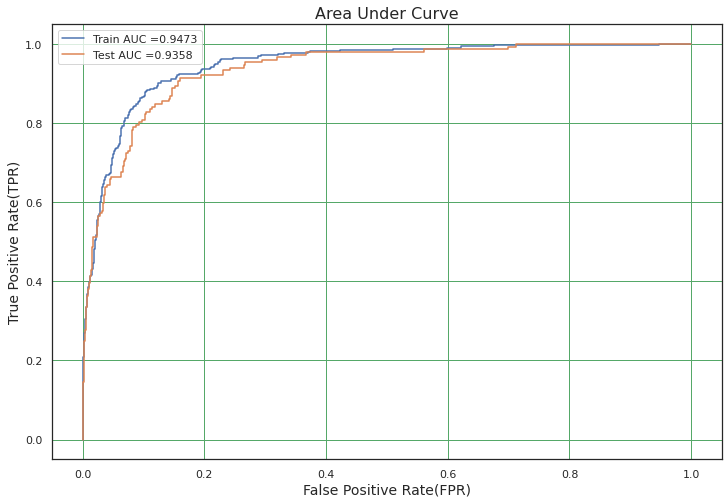

Best Threshold = 0.3967
Model AUC is : 0.9358


In [ ]:
test_auclr, best_tlr = validate_model(log, X_train, X_val, y_train, y_val)

print("Best Threshold = {:.4f}".format(best_tlr))
print("Model AUC is : {:.4f}".format(test_auclr))

In [ ]:
## Setting probability Threshold to 0.3967 i.e. best threshold

log_train_pred_60=(log.predict_proba(X_train)[:,1]>0.3967).astype(bool)
log_val_pred_60=(log.predict_proba(X_val)[:,1]>0.3967).astype(bool)

In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity

from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,auc

cm0 = confusion_matrix(y_train, log_train_pred_60,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, log_val_pred_60,labels=[1,0])
print('Confusion Matrix Val: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))

accuracy0=(cm0[0,0]+cm0[1,1])/total0                      # From the confusion matrix calculating accuracy
print ('Accuracy Train: ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Val: ', accuracy1)

sensitivity0 = cm0[0,0]/(cm0[0,0]+cm0[0,1])
print('Sensitivity Train : ', sensitivity0 )

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity Val: ', sensitivity1 )


specificity0 = cm0[1,1]/(cm0[1,0]+cm0[1,1])
print('Specificity Train: ', specificity0)

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity Val: ', specificity1)

AUC=roc_auc_score(y_val, log_val_pred_60)

print("AUC:",AUC)

print("F1-Score Train: ",f1_score(y_train, log_train_pred_60))

print("F1-Score Val: ",f1_score(y_val, log_val_pred_60))

Confusion Matrix Train : 
 [[ 313   41]
 [ 366 3067]]
Confusion Matrix Val: 
 [[ 128   24]
 [ 168 1303]]
Accuracy Train:  0.8925270662793768
Accuracy Val:  0.8817005545286506
Sensitivity Train :  0.884180790960452
Sensitivity Val:  0.8421052631578947
Specificity Train:  0.8933877075444218
Specificity Val:  0.8857919782460911
AUC: 0.863948620701993
F1-Score Train:  0.606001936108422
F1-Score Val:  0.5714285714285715


In [ ]:
## Test data predictions

log_test_pred_60 = (log.predict_proba(X_teststd)[:,1]>0.60).astype(bool)
log_test_pred=pd.DataFrame(log_test_pred_60)
log_test_pred.head(2)

,0
0,False
1,False


In [ ]:
# Replacing 1 with Yes and 0 With No
Replacement = {1:'Yes',0:'No'}

Labels=log_test_pred[0].apply(lambda x : Replacement[x])
Labels.value_counts()    #Checking the count of Predictions

No     1186
Yes     167
Name: 0, dtype: int64

In [ ]:
## Submission file
submission_log=pd.DataFrame({"Provider":Test_category_removed_groupedbyProv_PF.Provider})
submission_log['PotentialFraud']=Labels
submission_log.shape
(1353, 2)

(1353, 2)

In [ ]:
submission_log.PotentialFraud.value_counts()

No     1186
Yes     167
Name: PotentialFraud, dtype: int64

# **MODEL EVALUATION**

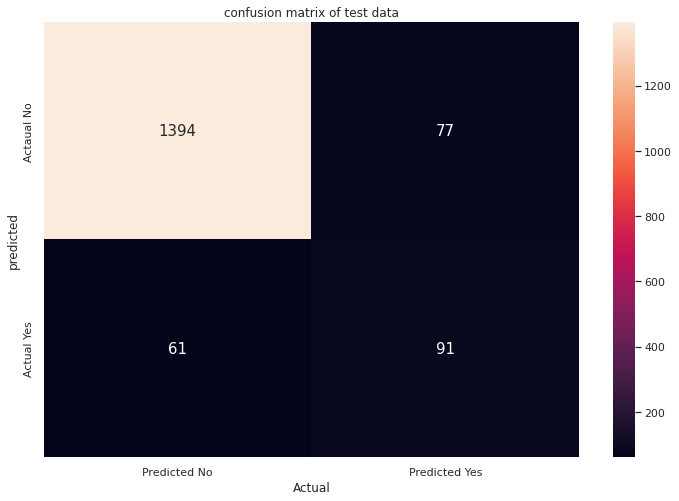

In [ ]:
#naive bayes

# prediction based on best threshold-confussion matrix
y_predidict=clf_model_gaussian1.predict_proba(X_val)[:,1]
prediction_tr=predict_with_best_t(y_predidict,0.0605)

conf_mat = pd.DataFrame(confusion_matrix(y_val, prediction_tr))

sns.heatmap(conf_mat, annot = True, fmt= 'd',annot_kws={"size": 15}, xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'])
plt.title('confusion matrix of test data')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()


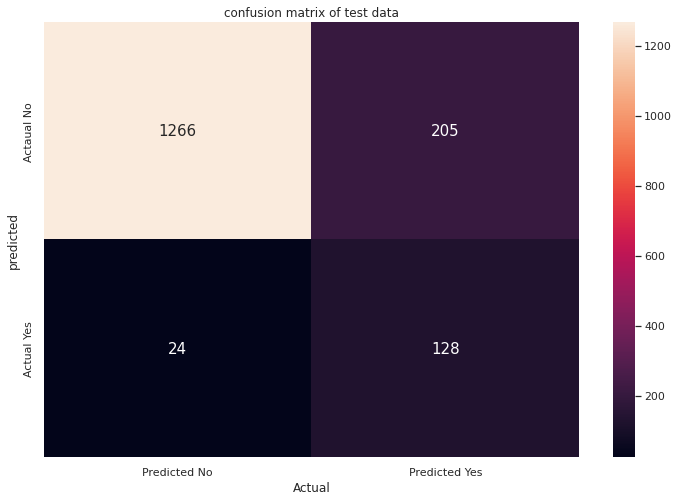

In [ ]:
#linear svc

# prediction based on best threshold-confussion matrix
y_predidict=clb_clf_svc.predict_proba(X_val)[:,1]
prediction_tr=predict_with_best_t(y_predidict,0.0677)

conf_mat = pd.DataFrame(confusion_matrix(y_val, prediction_tr))

sns.heatmap(conf_mat, annot = True, fmt= 'd',annot_kws={"size": 15}, xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'])
plt.title('confusion matrix of test data')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

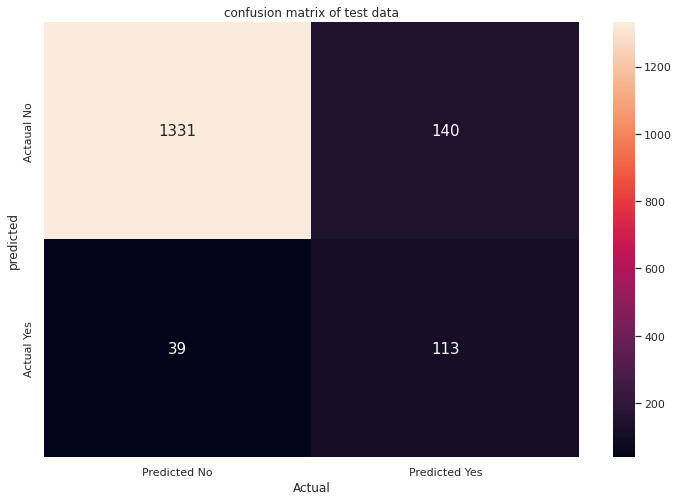

In [ ]:
#svm

# prediction based on best threshold-confussion matrix
y_predidict=clb_svc.predict_proba(X_val)[:,1]
prediction_tr=predict_with_best_t(y_predidict,0.0532)

conf_mat = pd.DataFrame(confusion_matrix(y_val, prediction_tr))

sns.heatmap(conf_mat, annot = True, fmt= 'd',annot_kws={"size": 15}, xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'])
plt.title('confusion matrix of test data')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

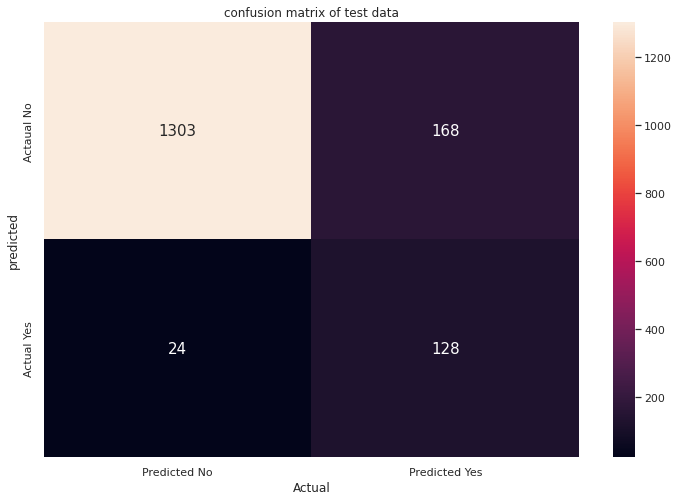

In [ ]:
#lr

# prediction based on best threshold-confussion matrix
y_predidict=log.predict_proba(X_val)[:,1]
prediction_tr=predict_with_best_t(y_predidict,0.3967)

conf_mat = pd.DataFrame(confusion_matrix(y_val, prediction_tr))

sns.heatmap(conf_mat, annot = True, fmt= 'd',annot_kws={"size": 15}, xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'])
plt.title('confusion matrix of test data')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()